## Part 1: Graphical Analysis

1. Scatter Diagram (10 points)
    - Choose a dataset (from UCI Machine Learning Repository).
    - Create a scatter diagram to visualize the relationship between two numerical variables.
    - Describe the relationship you observe. Is it linear, non-linear, or no 


The dataset used in this assignment is [Individual Household Electric Power Consumption](https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption) by *Georges Hebrail* and *Alice Berard*

In [1]:
# Getting the data from the dataset

import pandas as pd

df = pd.read_csv(
    "household_power_consumption.txt", 
    sep=';', 
    na_values='?', 
    low_memory=False
)

### Exploratory Data Analysis

In [2]:
df.shape

(2075259, 9)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [4]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [5]:
# Removing null values 
row,column = df.shape
previous_data_size = row * column

df.dropna(inplace=True)

row,column = df.shape
current_data_size = row*column

percentage_loss = "{:.2f}".format(((previous_data_size-current_data_size)/previous_data_size) * 100)
print(f"Percentage of data loss = {percentage_loss} %")

Percentage of data loss = 1.25 %


In [6]:
df.dtypes.value_counts()

float64    7
object     2
Name: count, dtype: int64

In [7]:
df.sample(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1885793,18/7/2010,07:17:00,1.312,0.098,241.33,5.4,0.0,1.0,18.0
1162426,2/3/2009,23:10:00,0.284,0.048,245.03,1.2,0.0,0.0,0.0
1660399,11/2/2010,18:43:00,2.842,0.472,238.97,12.0,0.0,0.0,1.0
1969167,14/9/2010,04:51:00,0.242,0.084,242.25,1.0,0.0,0.0,1.0
1562461,5/12/2009,18:25:00,3.362,0.350,235.66,14.2,0.0,0.0,18.0


In [8]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [9]:
df.describe(include='object')

,Date,Time
count,2049280,2049280
unique,1433,1440
top,2/12/2008,20:22:00
freq,1440,1427


### Scatter diagram

In [10]:
import matplotlib.pyplot as plt

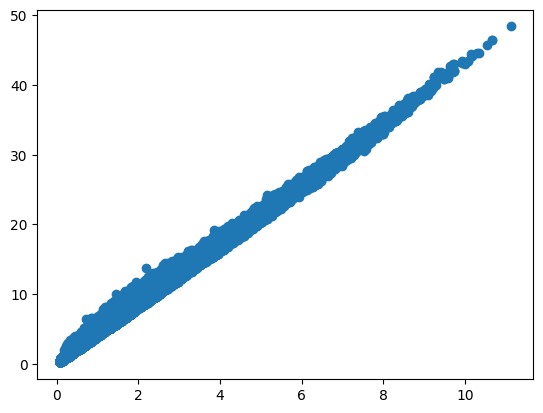

In [11]:
plt.scatter(df['Global_active_power'], df['Global_intensity'])

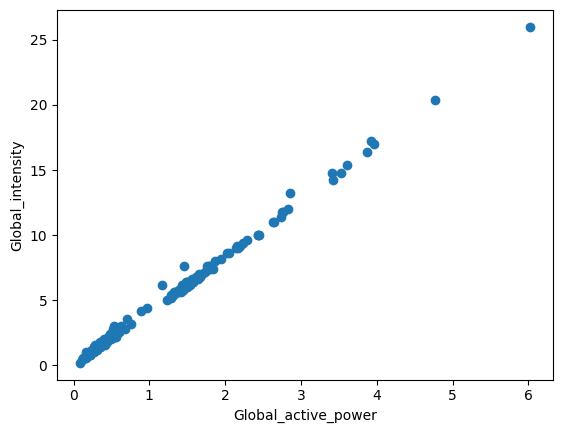

In [12]:
sample_df = df.sample(n=200, random_state=42)
plt.scatter(
    sample_df['Global_active_power'],
    sample_df['Global_intensity']
)
plt.xlabel('Global_active_power')
plt.ylabel('Global_intensity')
plt.show()

In [13]:
import numpy as np

slope, intercept = np.polyfit(sample_df['Global_active_power'], sample_df['Global_intensity'], 1)
line = slope * sample_df['Global_active_power'] + intercept

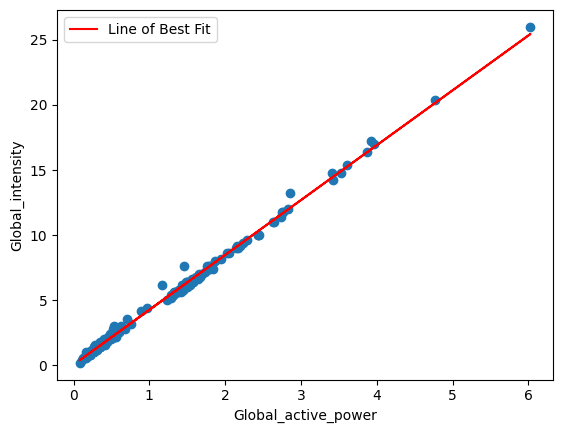

In [14]:
plt.scatter(sample_df['Global_active_power'], sample_df['Global_intensity'])
plt.plot(sample_df['Global_active_power'], line, color='red', label='Line of Best Fit')
plt.xlabel('Global_active_power')
plt.ylabel('Global_intensity')
plt.legend()
plt.show()

Interpretation:

From the above scatter plot of Global_active_power vs Global_intensity, we can conclude that the variables have strong positive linear correlation. Global_active_power while may not be the only factor that can predict Global_intensity values but it is a strong predictor.

2. Q-Q Plot (10 points)
    - Using the same dataset, create a Q-Q plot to assess the normality of one of the numerical variables.
    - Explain what a Q-Q plot is and how to interpret it. Does the data appear to follow a normal distribution? Justify your answer.

### Assess the normality of a numeric varaible

Lets use Voltage as our test varaible to see if its distribution is normal or not

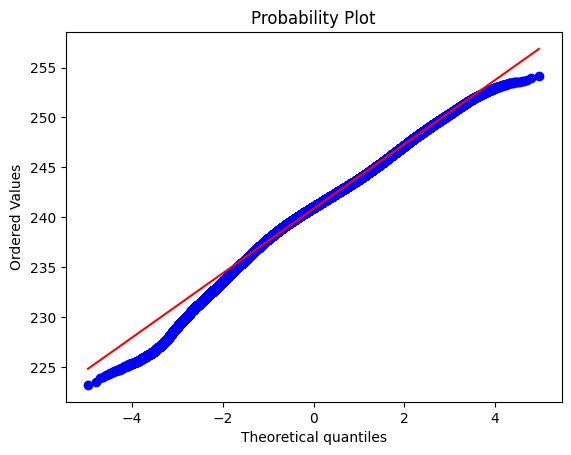

In [15]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(df['Voltage'], dist="norm", plot=plt)
plt.show()


### QQ plot

**What is Q-Q plot ?**

A Q-Q plot (Quantile-Quantile plot) is a plot of quantiles of test dataset against the quantiles of a theoretical distribution to visually check if the test data fits that distribution, with points forming a straight line indicating a good match, while deviations indicating skewness.

**How to Interpret It**

1. Perfect Fit
    - If the data perfectly matches the theoretical distribution, all points fall exactly on a straight, diagonal reference line (often \( y = x \)).
2. Normal Distribution (Common Use)
    - **Linear Pattern:** Points generally lying on a straight line (possibly with a different slope or intercept) suggest approximate normality.
3. Skewness
    - **Right Skew (Positive Skew):** An upward curve or S-shape at the end (upper tail).
    - **Left Skew (Negative Skew):** A downward curve or S-shape at the beginning (lower tail).
4. Kurtosis (Tail Behavior)
    - **Heavy Tails (Leptokurtic):** Points deviate upwards at both ends, indicating more extreme values than a normal distribution.
    - **Light Tails (Platykurtic):** Points deviate downwards at both ends, indicating fewer extreme values than a normal distribution.


**Does the above data show normal distribution?**

The data is approximately normally distributed in the center, but shows systematic deviations in the tails, indicating mild non-normality, likely due to skewness.

Justification:

Middle section aligns well with the red line:
- Around theoretical quantiles -1 to +3 Points closely follow the line
- Bulk of the data is roughly normal

In [16]:
df['Time'].head(20)

0     17:24:00
1     17:25:00
2     17:26:00
3     17:27:00
4     17:28:00
5     17:29:00
6     17:30:00
7     17:31:00
8     17:32:00
9     17:33:00
10    17:34:00
11    17:35:00
12    17:36:00
13    17:37:00
14    17:38:00
15    17:39:00
16    17:40:00
17    17:41:00
18    17:42:00
19    17:43:00
Name: Time, dtype: object

In [17]:
df['Time'].unique()

array(['17:24:00', '17:25:00', '17:26:00', ..., '17:21:00', '17:22:00',
       '17:23:00'], shape=(1440,), dtype=object)

In [18]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

In [19]:
df['Hour'] = df['Time'].dt.hour
df[['Time', 'Hour']].head(-5)

,Time,Hour
0,1900-01-01 17:24:00,17
1,1900-01-01 17:25:00,17
2,1900-01-01 17:26:00,17
3,1900-01-01 17:27:00,17
4,1900-01-01 17:28:00,17
...,...,...
2075249,1900-01-01 20:53:00,20
2075250,1900-01-01 20:54:00,20
2075251,1900-01-01 20:55:00,20
2075252,1900-01-01 20:56:00,20


In [20]:
def categorize_period(hour):
    if 5 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 16:
        return 'Afternoon'
    elif 17 <= hour <= 20:
        return 'Evening'
    else:
        return 'Night'

In [21]:
df['Period'] = df['Hour'].apply(categorize_period)

In [22]:
df[['Hour', 'Period']].head(-5)

,Hour,Period
0,17,Evening
1,17,Evening
2,17,Evening
3,17,Evening
4,17,Evening
...,...,...
2075249,20,Evening
2075250,20,Evening
2075251,20,Evening
2075252,20,Evening


In [23]:
numerical_var = 'Global_active_power'
categorical_var = 'Period'

In [24]:
categories = ['Morning', 'Afternoon', 'Evening', 'Night']

morning_data = df[df['Period'] == 'Morning'][numerical_var]
afternoon_data = df[df['Period'] == 'Afternoon'][numerical_var]
evening_data = df[df['Period'] == 'Evening'][numerical_var]
night_data = df[df['Period'] == 'Night'][numerical_var]

data_to_plot = [morning_data, afternoon_data, evening_data, night_data]

# one liner list comprehension
# data_to_plot = [df[df[categorical_var] == cat][numerical_var] for cat in categories]

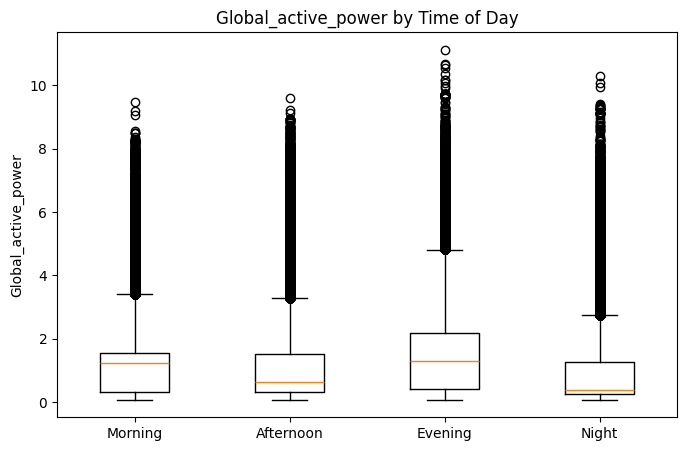

In [25]:
plt.figure(figsize=(8,5))
plt.boxplot(data_to_plot, tick_labels=categories)
plt.title(f'{numerical_var} by Time of Day')
plt.ylabel(numerical_var)
plt.show()

**Analysis of the Box plot**

1. **The spread of the data**

    - The spread of the data is indicated by the Interquartile Range and the length of the whiskers.
    - Evening Peak: The Evening category shows the largest spread. Both the box and the upper whisker are significantly taller than the other time periods.
      indicating that the power consumption is generally higher during these hours.
    - Night Lows: The Night category has the smallest spread and the lowest median. The box is compressed toward the bottom, indicating that for most of the night, power usage
      remains low.
    - Morning vs. Afternoon: These two are relatively similar in their range, though the Morning has a slightly higher median and a more balanced distribution within the box
      compared to the Afternoon.


2. **Presence of Outliers**
   
    - Across all four time periods, there is a heavy concentration of outliers.
    - Positive Skew: All distributions are heavily right-skewed. While the "normal" consumption stays mostly below 3 units, there are frequent instances where power usage spikes
      up to 8, 10, or even 11 units.
    - Extreme Events: The Evening session contains the most extreme outliers, reaching the highest point on the graph (above 11). Representing times when multiple high
      energy appliances are running simultaneously.
    - The Night Exception: Even though Night has the lowest average usage, it still shows a massive column of outliers. This suggests that while most people are asleep, certain
      households or specific nights involve high energy activity.